In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
sns.set_style("darkgrid")
%matplotlib inline
# plt.rcParams["figure.figsize"]=[12,9]

In [ ]:
import re
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import stop_words
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install jsonlines

In [ ]:
import jsonlines
X = []
y = []
z = []
with open ('/content/drive/MyDrive/ML/ML final exam/data.jl','rb') as f:
  for item in jsonlines.Reader(f):
    X.append(item['text'])
    y.append(item['voted_up'])
    z.append(item['early_access'])

In [ ]:
l = list(zip(X,y,z))  
df = pd.DataFrame(l, columns = ['text', 'voted_up','early_access'])  
print(df)

                                                   text  voted_up  early_access
0                              sooooo good.u must play.      True         False
1                             it's a fun csgo ww2 game!      True         False
2     This is one of my favourite game on my main ac...      True          True
3     С помощью этой игры я полюбила детей. 10 отруб...      True         False
4     I worked on this game - and I love it - No com...      True         False
...                                                 ...       ...           ...
4995  Ce jeu est pff, ya pas de mot pour le définir ...     False          True
4996  Alles net so Gut umsonst so lange gewartet Que...     False         False
4997                                                  -     False         False
4998  Cant play normal game it forces you to play th...     False          True
4999  I refunded this garbage. If you wanna know mor...     False         False

[5000 rows x 3 columns]


In [ ]:
#remove punctuations from review
def cleanReview (text):
  #converting reviews to lowercase
  text = text.lower()
  text = re.sub(r'["#$%&()*+\,\-\.:;<=>?@\[\\\]\^_`{\|}~]', ' ', text)
  return text

df['text'] = df.text.apply(cleanReview)
df['voted_up'] =[1 if x==True else 0 for x in df['voted_up']]
df['early_access'] =[1 if x==True else 0 for x in df['early_access']]
print(df)

                                                   text  voted_up  early_access
0                              sooooo good u must play          1             0
1                             it's a fun csgo ww2 game!         1             0
2     this is one of my favourite game on my main ac...         1             1
3     с помощью этой игры я полюбила детей  10 отруб...         1             0
4     i worked on this game   and i love it   no com...         1             0
...                                                 ...       ...           ...
4995  ce jeu est pff  ya pas de mot pour le définir ...         0             1
4996  alles net so gut umsonst so lange gewartet que...         0             0
4997                                                            0             0
4998  cant play normal game it forces you to play th...         0             1
4999  i refunded this garbage  if you wanna know mor...         0             0

[5000 rows x 3 columns]


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
print(df)

                                                   text  voted_up  early_access
0     i love csgo is just the best game ever! first ...         1             0
1     игра ohuennaia  но друг обидлся и не захотел и...         0             0
2            only if         this game was less sh  ty!         0             0
3     не рекомендую к покупке   регистрация  графика...         0             0
4                                                   gay         0             0
...                                                 ...       ...           ...
4995                                                 gg         0             0
4996  игра очень хорошая советую всем даже если вы н...         1             0
4997                                       rip keyboard         1             0
4998                               класссссс игра класс         1             0
4999  this game  sheesh  look  it has its issues  it...         1             0

[5000 rows x 3 columns]


In [ ]:
print("Number of entries in the dataset \n", df.count())
duplicate = df[df.duplicated()].count()
print("Number of duplicate entries \n",duplicate)
clean_df = df.drop_duplicates()
print("Number of entries in the dataset after removing duplicates \n", clean_df.count())
print(clean_df)

Number of entries in the dataset 
 text            5000
voted_up        5000
early_access    5000
dtype: int64
Number of duplicate entries 
 text            180
voted_up        180
early_access    180
dtype: int64
Number of entries in the dataset after removing duplicates 
 text            4820
voted_up        4820
early_access    4820
dtype: int64
                                                   text  voted_up  early_access
0     i love csgo is just the best game ever! first ...         1             0
1     игра ohuennaia  но друг обидлся и не захотел и...         0             0
2            only if         this game was less sh  ty!         0             0
3     не рекомендую к покупке   регистрация  графика...         0             0
4                                                   gay         0             0
...                                                 ...       ...           ...
4995                                                 gg         0             0
4996  игр

In [ ]:
X = clean_df.text
y = clean_df.voted_up
z = clean_df.early_access

In [ ]:
df_train, df_test = train_test_split(clean_df, test_size = 0.2)
df_valid, df_test = train_test_split(df_test,test_size=0.5)

print("Training data size", df_train['text'].shape,
      df_train['voted_up'].shape, df_train['early_access'].shape);
print("Validation data size", df_valid['text'].shape,
      df_valid['voted_up'].shape, df_valid['early_access'].shape);
print("Test data size", df_test['text'].shape,
      df_test['voted_up'].shape, df_test['early_access'].shape);

Training data size (3856,) (3856,) (3856,)
Validation data size (482,) (482,) (482,)
Test data size (482,) (482,) (482,)


In [ ]:
df_train.to_csv('/content/drive/MyDrive/ML/ML final exam/train.csv')
df_valid.to_csv('/content/drive/MyDrive/ML/ML final exam/validation.csv')
df_test.to_csv('/content/drive/MyDrive/ML/ML final exam/test.csv')

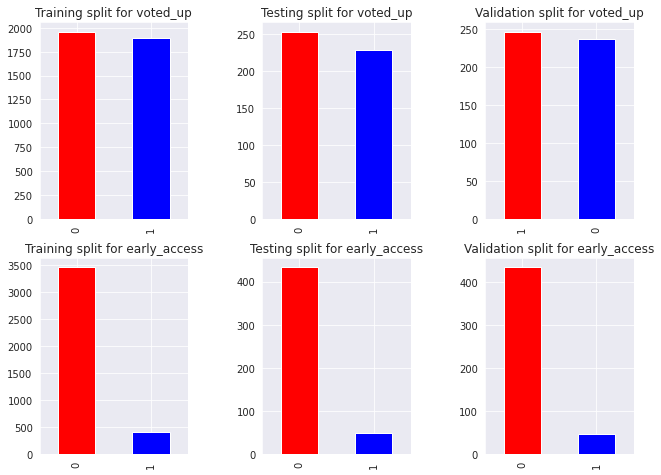

In [ ]:
fig,ax = plt.subplots(2,3)
plt.subplots_adjust(top=2, bottom = 0.5,right = 1.5, wspace = 0.5)

plt.subplot(2,3,1)
df_train['voted_up'].value_counts()[:].plot(kind='bar', color=['r','b']);
plt.title("Training split for voted_up")

plt.subplot(2,3,2)
df_test['voted_up'].value_counts()[:].plot(kind='bar', color=['r','b']);
plt.title("Testing split for voted_up")

plt.subplot(2,3,3)
df_valid['voted_up'].value_counts()[:].plot(kind='bar', color=['r','b']);
plt.title("Validation split for voted_up");

plt.subplot(2,3,4)
df_train['early_access'].value_counts()[:].plot(kind='bar', color=['r','b']);
plt.title("Training split for early_access")

plt.subplot(2,3,5)
df_test['early_access'].value_counts()[:].plot(kind='bar', color=['r','b']);
plt.title("Testing split for early_access")

plt.subplot(2,3,6)
df_valid['early_access'].value_counts()[:].plot(kind='bar', color=['r','b']);
plt.title("Validation split for early_access");

In [ ]:
count_vectorizer = CountVectorizer()
fit_count_vectorizer = count_vectorizer.fit_transform(df_train['text'])
print("Size of count_vectorizer: ", fit_count_vectorizer.toarray().shape)
print("Values in count_vectorizer: ", fit_count_vectorizer.toarray())
print("Unique values in count_vectorizer: ", np.unique(fit_count_vectorizer.toarray()))

tfidf_vectorizer = TfidfVectorizer()
fit_tfidf_vectorizer = tfidf_vectorizer.fit_transform(df_train['text'])
print("Size of tfidf_vectorizer: ", fit_tfidf_vectorizer.toarray().shape)
print("Values in tfidf_vectorizer: ", fit_tfidf_vectorizer.toarray())
print("Unique values in tfidf_vectorizer: ", np.unique(fit_tfidf_vectorizer.toarray()))

Size of count_vectorizer:  (3856, 45341)
Values in count_vectorizer:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Unique values in count_vectorizer:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 48 50
 51 52 53 54 57 59 62 63 64 66 70 73 74 76 82 83 95]
Size of tfidf_vectorizer:  (3856, 45341)
Values in tfidf_vectorizer:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Unique values in tfidf_vectorizer:  [0.         0.00484928 0.00560245 ... 0.96988843 0.99212389 1.        ]


In [ ]:
def implPipeline (vect, classifier, train_input, train_output, 
                  test_input, test_output, valid_input, valid_output, 
                  name, field, accuracy_needed = False, 
                  report_needed = False, plot_needed = False):
  pipeline = Pipeline([('vect', vect),('clf', classifier)])
  pipeline.fit(train_input, train_output)
  prob = pipeline.predict_proba(test_input)
  prob = prob[:, 1]
  Ypred_test = pipeline.predict(test_input)
  Ypred_train = pipeline.predict(train_input)
  Ypred_valid = pipeline.predict(valid_input)

  labels = ['False','True']

  if accuracy_needed==True:
    print('Training accuracy %s' % (accuracy_score(Ypred_train, train_output)*100))
    print('Validation accuracy %s' % (accuracy_score(Ypred_valid, valid_output)*100))
    print('Testing accuracy  %s' % (accuracy_score(Ypred_test, test_output)*100))

  if report_needed==True:
    print("Test Set Classification Report \n",classification_report(test_output, Ypred_test, target_names=labels))
    print("Test Set Confusion Matrix: \n", confusion_matrix(test_output, Ypred_test))
  
  if plot_needed == True:
    fpr, tpr, _ = roc_curve(test_output, prob)
    auc = roc_auc_score(test_output, prob)
    plt.plot(fpr, tpr, marker='.',color='r', label='%s (area = %0.2f)' % (name,auc))
    plt.plot([0, 1], [0, 1], linestyle='--',color='b', label='Baseline')
    plt.legend(loc="lower right")
    plt.title(name+' model \n'+ field +' field' 
              +'\n training accuracy %s' % round(accuracy_score(Ypred_train, train_output)*100,3)
              +'\n validation accuracy %s' % round(accuracy_score(Ypred_valid, valid_output)*100,3)
              +'\n test accuracy %s' % round(accuracy_score(Ypred_test, test_output)*100,3))

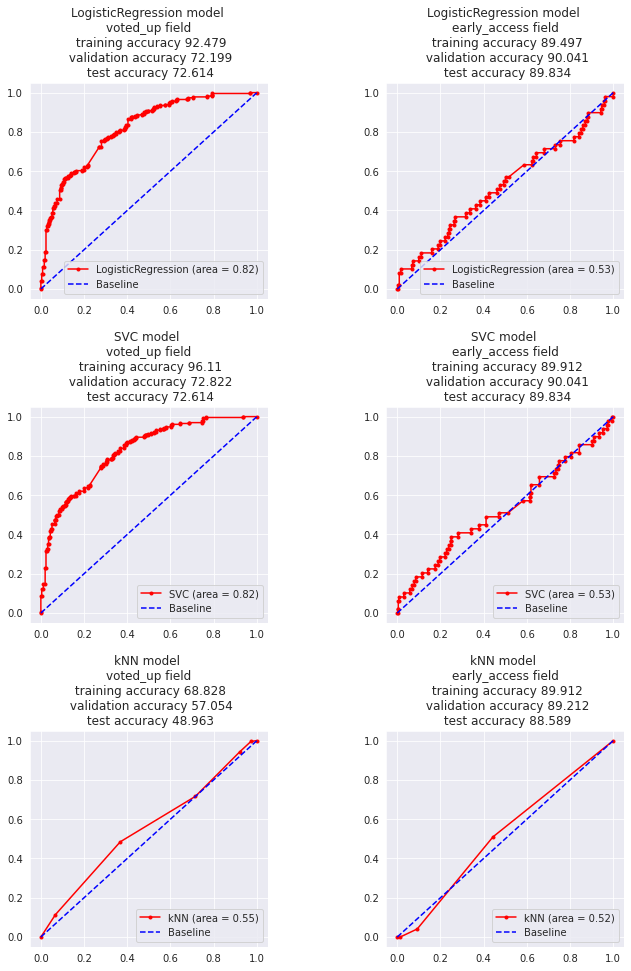

In [ ]:
fig,ax = plt.subplots(3,2)
plt.subplots_adjust(top = 3.5, bottom = 0.5,right = 1.5, wspace = 0.5,hspace= 0.5)
plt.subplot(3,2,1)
implPipeline( TfidfVectorizer(), LogisticRegression(), df_train['text'], df_train['voted_up'], 
             df_test['text'], df_test['voted_up'], df_valid['text'], df_valid['voted_up'], 
             name ='LogisticRegression',field= 'voted_up', plot_needed = True)

plt.subplot(3,2,2)
implPipeline( TfidfVectorizer(), LogisticRegression(), df_train['text'], df_train['early_access'], 
             df_test['text'], df_test['early_access'], df_valid['text'], df_valid['early_access'], 
             name ='LogisticRegression',field= 'early_access', plot_needed = True)

plt.subplot(3,2,3)
implPipeline( TfidfVectorizer(), SGDClassifier(loss='log'), df_train['text'], df_train['voted_up'], 
             df_test['text'], df_test['voted_up'], df_valid['text'], df_valid['voted_up'], 
             name ='SVC', field= 'voted_up', plot_needed = True)

plt.subplot(3,2,4)
implPipeline( TfidfVectorizer(), SGDClassifier(loss='log'), df_train['text'], df_train['early_access'], 
             df_test['text'], df_test['early_access'], df_valid['text'], df_valid['early_access'], 
             name ='SVC',field= 'early_access', plot_needed = True)

plt.subplot(3,2,5)
implPipeline( TfidfVectorizer(), KNeighborsClassifier(), df_train['text'], df_train['voted_up'], 
             df_test['text'], df_test['voted_up'], df_valid['text'], df_valid['voted_up'], 
             name ='kNN', field= 'voted_up', plot_needed = True)

plt.subplot(3,2,6)
implPipeline( TfidfVectorizer(), KNeighborsClassifier(), df_train['text'], df_train['early_access'], 
             df_test['text'], df_test['early_access'], df_valid['text'], df_valid['early_access'], 
             name ='kNN',field= 'early_access', plot_needed = True)

In [ ]:
def remove_stopwords(text):
  text = ' '.join(word for word in text.split() if word not in stop_words.ENGLISH_STOP_WORDS)
  return text

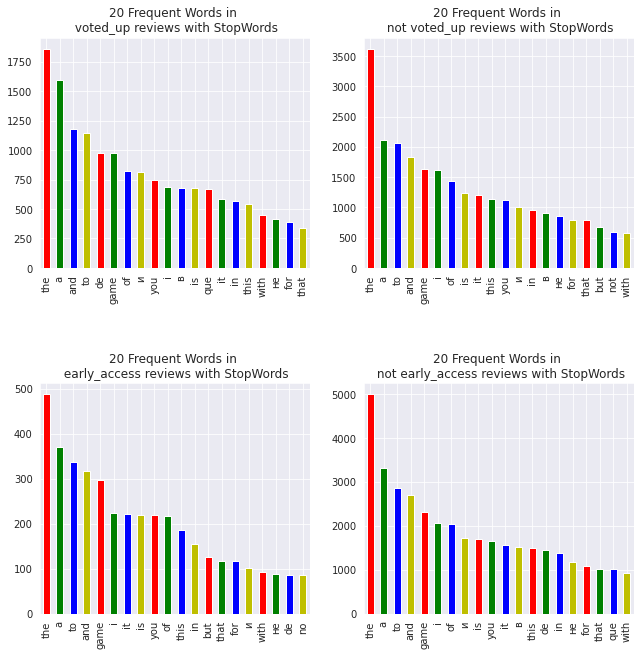

In [ ]:
fig,ax = plt.subplots(2,2)
plt.subplots_adjust(top= 2, bottom = 0,right = 1.5, wspace = 0.2, hspace = 0.5)

plt.subplot(2,2,1)
voted_up_words = df_train.loc[df_train['voted_up']==1]['text']
voted_up_words = pd.Series(" ".join(voted_up_words).split())
plt.title("20 Frequent Words in \n voted_up reviews with StopWords")
voted_up_words.value_counts()[0:20].plot(kind='bar',color=['r','g','b','y'])

plt.subplot(2,2,2)
not_voted_up_words = df_train.loc[df_train['voted_up']==0]['text']
not_voted_up_words = pd.Series(" ".join(not_voted_up_words).split())
plt.title("20 Frequent Words in \n not voted_up reviews with StopWords")
not_voted_up_words.value_counts()[0:20].plot(kind='bar',color=['r','g','b','y'])

plt.subplot(2,2,3)
early_access_words = df_train.loc[df_train['early_access']==1]['text']
early_access_words = pd.Series(" ".join(early_access_words).split())
plt.title("20 Frequent Words in \n early_access reviews with StopWords")
early_access_words.value_counts()[0:20].plot(kind='bar',color=['r','g','b','y'])

plt.subplot(2,2,4)
not_early_access_words = df_train.loc[df_train['early_access']==0]['text']
not_early_access_words = pd.Series(" ".join(not_early_access_words).split())
plt.title("20 Frequent Words in \n not early_access reviews with StopWords")
not_early_access_words.value_counts()[0:20].plot(kind='bar',color=['r','g','b','y'])

In [ ]:
train_without_stopwords = df_train.copy()
train_without_stopwords['text'] = train_without_stopwords.text.apply(remove_stopwords)

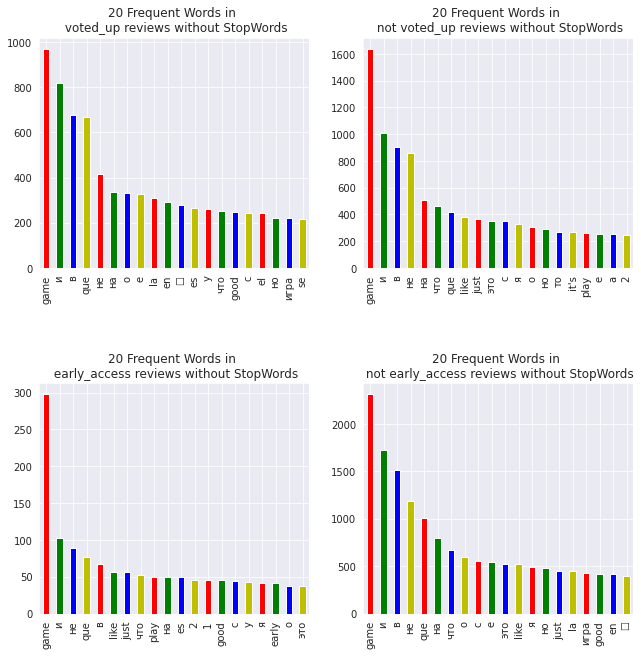

In [ ]:
fig,ax = plt.subplots(2,2)
plt.subplots_adjust(top= 2, bottom = 0,right = 1.5, wspace = 0.2, hspace = 0.5)

plt.subplot(2,2,1)
voted_up_words = train_without_stopwords.loc[train_without_stopwords['voted_up']==1]['text']
voted_up_words = pd.Series(" ".join(voted_up_words).split())
plt.title("20 Frequent Words in \n voted_up reviews without StopWords")
voted_up_words.value_counts()[0:20].plot(kind='bar',color=['r','g','b','y'])

plt.subplot(2,2,2)
not_voted_up_words = train_without_stopwords.loc[train_without_stopwords['voted_up']==0]['text']
not_voted_up_words = pd.Series(" ".join(not_voted_up_words).split())
plt.title("20 Frequent Words in \n not voted_up reviews without StopWords")
not_voted_up_words.value_counts()[0:20].plot(kind='bar',color=['r','g','b','y'])

plt.subplot(2,2,3)
early_access_words = train_without_stopwords.loc[train_without_stopwords['early_access']==1]['text']
early_access_words = pd.Series(" ".join(early_access_words).split())
plt.title("20 Frequent Words in \n early_access reviews without StopWords")
early_access_words.value_counts()[0:20].plot(kind='bar',color=['r','g','b','y'])

plt.subplot(2,2,4)
not_early_access_words = train_without_stopwords.loc[train_without_stopwords['early_access']==0]['text']
not_early_access_words = pd.Series(" ".join(not_early_access_words).split())
plt.title("20 Frequent Words in \n not early_access reviews without StopWords")
not_early_access_words.value_counts()[0:20].plot(kind='bar',color=['r','g','b','y'])

Training accuracy 97.38070539419087
Validation accuracy 71.57676348547717
Testing accuracy  72.61410788381743
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.80      0.64      0.71       253
        True       0.68      0.82      0.74       229

    accuracy                           0.73       482
   macro avg       0.74      0.73      0.73       482
weighted avg       0.74      0.73      0.72       482

Test Set Confusion Matrix: 
 [[163  90]
 [ 42 187]]


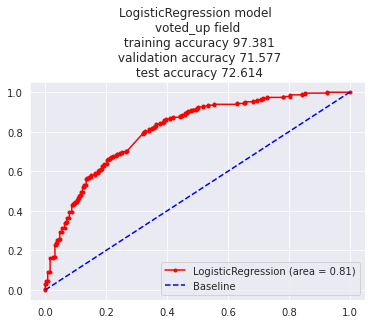

In [ ]:
#LogisticRegression with stopwords for voted_up
implPipeline( CountVectorizer(), LogisticRegression(),
             df_train['text'], df_train['voted_up'],
             df_test['text'], df_test['voted_up'],
             df_valid['text'], df_valid['voted_up'],
             name ='LogisticRegression', field = 'voted_up', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 95.95435684647303
Validation accuracy 89.83402489626556
Testing accuracy  89.41908713692946
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.90      0.99      0.94       433
        True       0.38      0.06      0.11        49

    accuracy                           0.89       482
   macro avg       0.64      0.52      0.52       482
weighted avg       0.85      0.89      0.86       482

Test Set Confusion Matrix: 
 [[428   5]
 [ 46   3]]


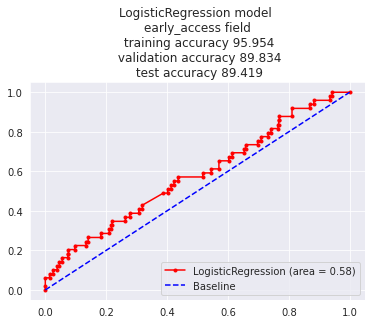

In [ ]:
#LogisticRegression with stopwords for early_access
implPipeline( CountVectorizer(), LogisticRegression(),
             df_train['text'], df_train['early_access'],
             df_test['text'], df_test['early_access'],
             df_valid['text'], df_valid['early_access'],
             name ='LogisticRegression', field = 'early_access', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 97.22510373443983
Validation accuracy 70.33195020746888
Testing accuracy  72.82157676348547
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.79      0.66      0.72       253
        True       0.68      0.80      0.74       229

    accuracy                           0.73       482
   macro avg       0.73      0.73      0.73       482
weighted avg       0.74      0.73      0.73       482

Test Set Confusion Matrix: 
 [[167  86]
 [ 45 184]]


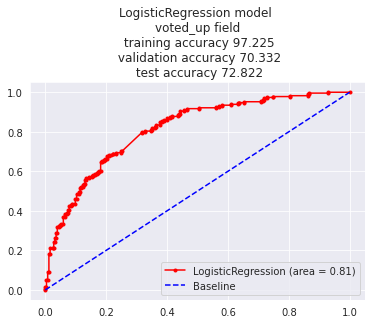

In [ ]:
#LogisticRegression without stopwords for voted_up
implPipeline( CountVectorizer(stop_words='english'), LogisticRegression(),
             df_train['text'], df_train['voted_up'],
             df_test['text'], df_test['voted_up'],
             df_valid['text'], df_valid['voted_up'],
             name ='LogisticRegression', field = 'voted_up', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 95.66908713692946
Validation accuracy 89.62655601659752
Testing accuracy  90.04149377593362
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.90      1.00      0.95       433
        True       0.60      0.06      0.11        49

    accuracy                           0.90       482
   macro avg       0.75      0.53      0.53       482
weighted avg       0.87      0.90      0.86       482

Test Set Confusion Matrix: 
 [[431   2]
 [ 46   3]]


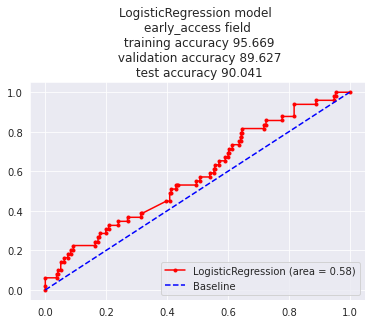

In [ ]:
#LogisticRegression without stopwords for early_access
implPipeline( CountVectorizer(stop_words='english'), LogisticRegression(),
             df_train['text'], df_train['early_access'],
             df_test['text'], df_test['early_access'],
             df_valid['text'], df_valid['early_access'],
             name ='LogisticRegression', field = 'early_access', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 98.3402489626556
Validation accuracy 73.44398340248964
Testing accuracy  72.82157676348547
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.77      0.68      0.72       253
        True       0.69      0.78      0.73       229

    accuracy                           0.73       482
   macro avg       0.73      0.73      0.73       482
weighted avg       0.73      0.73      0.73       482

Test Set Confusion Matrix: 
 [[172  81]
 [ 50 179]]


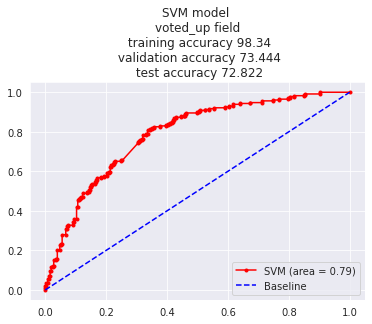

In [ ]:
#SVM with stopwords for voted_up
implPipeline( CountVectorizer(), SGDClassifier(loss='log'),
             df_train['text'], df_train['voted_up'],
             df_test['text'], df_test['voted_up'],
             df_valid['text'], df_valid['voted_up'],
             name ='SVM', field = 'voted_up', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 97.58817427385893
Validation accuracy 89.00414937759335
Testing accuracy  87.34439834024896
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.90      0.97      0.93       433
        True       0.12      0.04      0.06        49

    accuracy                           0.87       482
   macro avg       0.51      0.50      0.50       482
weighted avg       0.82      0.87      0.84       482

Test Set Confusion Matrix: 
 [[419  14]
 [ 47   2]]


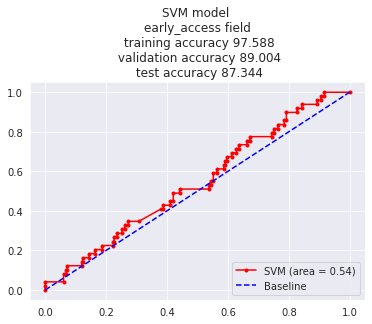

In [ ]:
#SVM with stopwords for early_access
implPipeline( CountVectorizer(), SGDClassifier(loss='log'),
             df_train['text'], df_train['early_access'],
             df_test['text'], df_test['early_access'],
             df_valid['text'], df_valid['early_access'],
             name ='SVM', field = 'early_access', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 98.05497925311202
Validation accuracy 70.95435684647303
Testing accuracy  72.40663900414937
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.78      0.67      0.72       253
        True       0.68      0.79      0.73       229

    accuracy                           0.72       482
   macro avg       0.73      0.73      0.72       482
weighted avg       0.73      0.72      0.72       482

Test Set Confusion Matrix: 
 [[169  84]
 [ 49 180]]


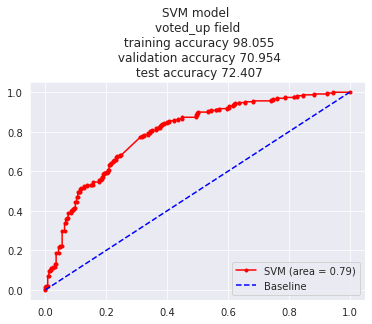

In [ ]:
#SVM without stopwords for voted_up
implPipeline( CountVectorizer(stop_words='english'), SGDClassifier(loss='log'),
             df_train['text'], df_train['voted_up'],
             df_test['text'], df_test['voted_up'],
             df_valid['text'], df_valid['voted_up'],
             name ='SVM', field = 'voted_up', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 97.899377593361
Validation accuracy 89.62655601659752
Testing accuracy  87.75933609958506
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.90      0.97      0.93       433
        True       0.19      0.06      0.09        49

    accuracy                           0.88       482
   macro avg       0.54      0.52      0.51       482
weighted avg       0.83      0.88      0.85       482

Test Set Confusion Matrix: 
 [[420  13]
 [ 46   3]]


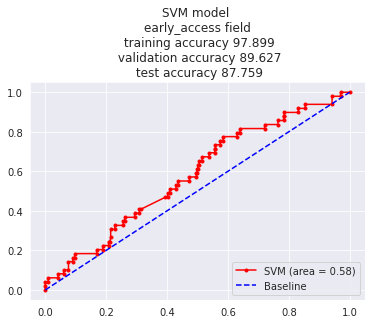

In [ ]:
#SVM without stopwords for early_access
implPipeline( CountVectorizer(stop_words='english'), SGDClassifier(loss='log'),
             df_train['text'], df_train['early_access'],
             df_test['text'], df_test['early_access'],
             df_valid['text'], df_valid['early_access'],
             name ='SVM', field = 'early_access', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 75.57053941908714
Validation accuracy 53.7344398340249
Testing accuracy  55.809128630705395
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.59      0.53      0.56       253
        True       0.53      0.59      0.56       229

    accuracy                           0.56       482
   macro avg       0.56      0.56      0.56       482
weighted avg       0.56      0.56      0.56       482

Test Set Confusion Matrix: 
 [[135 118]
 [ 95 134]]


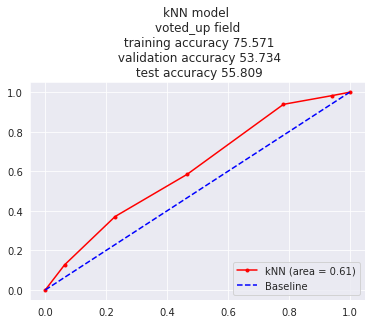

In [ ]:
#kNN with stopwords for voted_up
implPipeline( CountVectorizer(), KNeighborsClassifier(),
             df_train['text'], df_train['voted_up'],
             df_test['text'], df_test['voted_up'],
             df_valid['text'], df_valid['voted_up'],
             name ='kNN', field = 'voted_up', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 89.85995850622407
Validation accuracy 89.41908713692946
Testing accuracy  89.62655601659752
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.90      1.00      0.95       433
        True       0.00      0.00      0.00        49

    accuracy                           0.90       482
   macro avg       0.45      0.50      0.47       482
weighted avg       0.81      0.90      0.85       482

Test Set Confusion Matrix: 
 [[432   1]
 [ 49   0]]


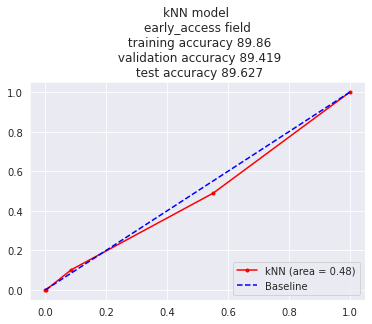

In [ ]:
#kNN with stopwords for early_access
implPipeline( CountVectorizer(), KNeighborsClassifier(),
             df_train['text'], df_train['early_access'],
             df_test['text'], df_test['early_access'],
             df_valid['text'], df_valid['early_access'],
             name ='kNN', field = 'early_access', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 72.53630705394191
Validation accuracy 53.7344398340249
Testing accuracy  57.05394190871369
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.60      0.53      0.57       253
        True       0.54      0.61      0.57       229

    accuracy                           0.57       482
   macro avg       0.57      0.57      0.57       482
weighted avg       0.57      0.57      0.57       482

Test Set Confusion Matrix: 
 [[135 118]
 [ 89 140]]


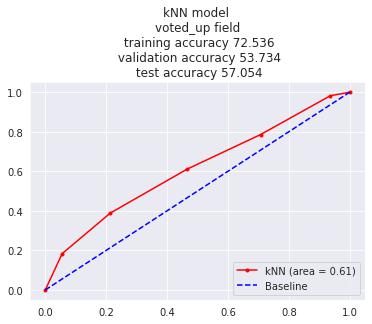

In [ ]:
#kNN without stopwords for voted_up
implPipeline( CountVectorizer(stop_words='english'), KNeighborsClassifier(),
             df_train['text'], df_train['voted_up'],
             df_test['text'], df_test['voted_up'],
             df_valid['text'], df_valid['voted_up'],
             name ='kNN', field = 'voted_up', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 90.24896265560166
Validation accuracy 89.62655601659752
Testing accuracy  89.62655601659752
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.90      1.00      0.95       433
        True       0.00      0.00      0.00        49

    accuracy                           0.90       482
   macro avg       0.45      0.50      0.47       482
weighted avg       0.81      0.90      0.85       482

Test Set Confusion Matrix: 
 [[432   1]
 [ 49   0]]


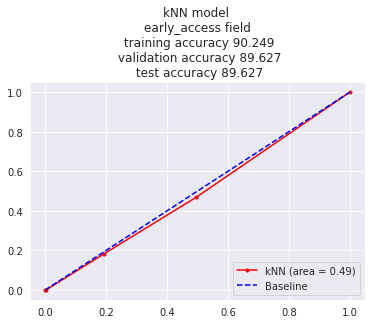

In [ ]:
#kNN without stopwords for early_access
implPipeline( CountVectorizer(stop_words='english'), KNeighborsClassifier(),
             df_train['text'], df_train['early_access'],
             df_test['text'], df_test['early_access'],
             df_valid['text'], df_valid['early_access'],
             name ='kNN', field = 'early_access', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

## **Hyperparameter Tuning**


--------------Logistic Regression model:----------------
Training accuracy 97.17323651452283
Validation accuracy 70.33195020746888
Testing accuracy  72.82157676348547
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.79      0.66      0.72       253
        True       0.68      0.80      0.74       229

    accuracy                           0.73       482
   macro avg       0.73      0.73      0.73       482
weighted avg       0.74      0.73      0.73       482

Test Set Confusion Matrix: 
 [[167  86]
 [ 45 184]]


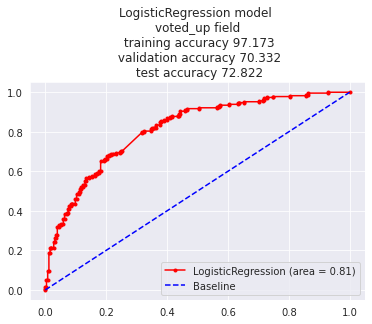

In [ ]:
print("\n--------------Logistic Regression model:----------------")
implPipeline( CountVectorizer(stop_words='english'), LogisticRegression(C=0.97),
             df_train['text'], df_train['voted_up'],
             df_test['text'], df_test['voted_up'],
             df_valid['text'], df_valid['voted_up'],
             name ='LogisticRegression', field = 'voted_up', 
             accuracy_needed =True, report_needed = True, plot_needed = True)


--------------Logistic Regression model:----------------
Training accuracy 94.86514522821577
Validation accuracy 89.62655601659752
Testing accuracy  90.45643153526972
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.90      1.00      0.95       433
        True       1.00      0.06      0.12        49

    accuracy                           0.90       482
   macro avg       0.95      0.53      0.53       482
weighted avg       0.91      0.90      0.86       482

Test Set Confusion Matrix: 
 [[433   0]
 [ 46   3]]


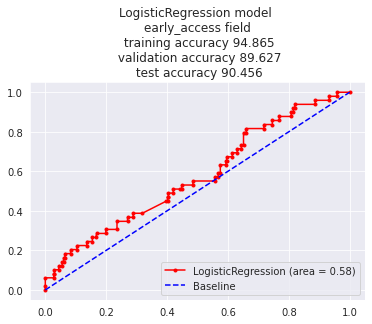

In [ ]:
print("\n--------------Logistic Regression model:----------------")
implPipeline( CountVectorizer(stop_words='english'), LogisticRegression(C=0.1),
             df_train['text'], df_train['early_access'],
             df_test['text'], df_test['early_access'],
             df_valid['text'], df_valid['early_access'],
             name ='LogisticRegression', field = 'early_access', 
             accuracy_needed =True, report_needed = True, plot_needed = True)


--------------SVM model:----------------
Training accuracy 95.38381742738589
Validation accuracy 71.57676348547717
Testing accuracy  75.10373443983403
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.82      0.67      0.74       253
        True       0.70      0.84      0.76       229

    accuracy                           0.75       482
   macro avg       0.76      0.76      0.75       482
weighted avg       0.76      0.75      0.75       482

Test Set Confusion Matrix: 
 [[169  84]
 [ 36 193]]


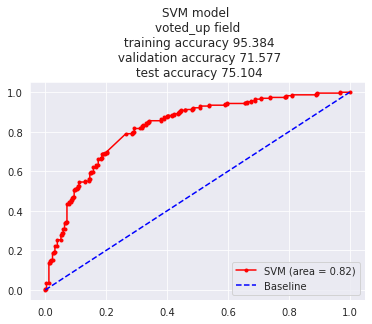

In [ ]:
print("\n--------------SVM model:----------------")
implPipeline( CountVectorizer(stop_words='english'), SGDClassifier(loss='log', alpha=0.001),
             df_train['text'], df_train['voted_up'],
             df_test['text'], df_test['voted_up'],
             df_valid['text'], df_valid['voted_up'],
             name ='SVM', field = 'voted_up', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

Training accuracy 93.49066390041494
Validation accuracy 89.83402489626556
Testing accuracy  90.45643153526972
Test Set Classification Report 
               precision    recall  f1-score   support

       False       0.90      1.00      0.95       433
        True       1.00      0.06      0.12        49

    accuracy                           0.90       482
   macro avg       0.95      0.53      0.53       482
weighted avg       0.91      0.90      0.86       482

Test Set Confusion Matrix: 
 [[433   0]
 [ 46   3]]


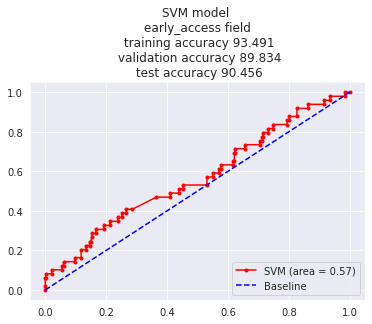

In [ ]:
print("\n--------------SVM model:----------------")
implPipeline( CountVectorizer(stop_words='english'), SGDClassifier(loss='log', alpha=0.001),
             df_train['text'], df_train['early_access'],
             df_test['text'], df_test['early_access'],
             df_valid['text'], df_valid['early_access'],
             name ='SVM', field = 'early_access', 
             accuracy_needed =True, report_needed = True, plot_needed = True)

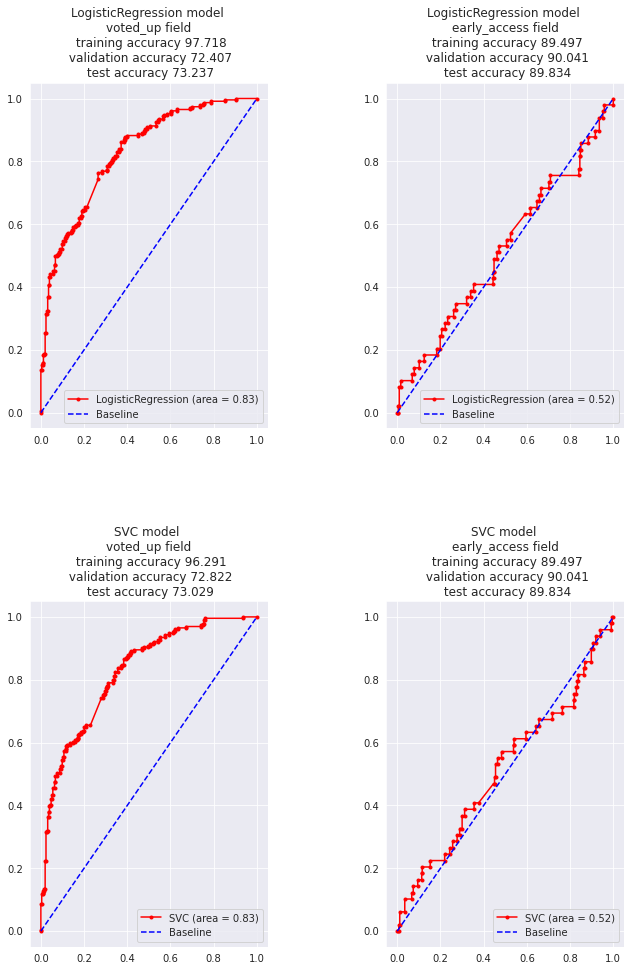

In [ ]:
fig,ax = plt.subplots(2,2)
plt.subplots_adjust(top = 3.5, bottom = 0.5,right = 1.5, wspace = 0.5,hspace= 0.5)
plt.subplot(2,2,1)
implPipeline( TfidfVectorizer(), LogisticRegression(C=5), df_train['text'], df_train['voted_up'], 
             df_test['text'], df_test['voted_up'], df_valid['text'], df_valid['voted_up'], 
             name ='LogisticRegression',field= 'voted_up', plot_needed = True)

plt.subplot(2,2,2)
implPipeline( TfidfVectorizer(), LogisticRegression(C=0.7), df_train['text'], df_train['early_access'], 
             df_test['text'], df_test['early_access'], df_valid['text'], df_valid['early_access'], 
             name ='LogisticRegression',field= 'early_access', plot_needed = True)

plt.subplot(2,2,3)
implPipeline( TfidfVectorizer(), SGDClassifier(loss='log', alpha=0.0001), df_train['text'], df_train['voted_up'], 
             df_test['text'], df_test['voted_up'], df_valid['text'], df_valid['voted_up'], 
             name ='SVC', field= 'voted_up', plot_needed = True)

plt.subplot(2,2,4)
implPipeline( TfidfVectorizer(), SGDClassifier(loss='log', alpha=0.001), df_train['text'], df_train['early_access'], 
             df_test['text'], df_test['early_access'], df_valid['text'], df_valid['early_access'], 
             name ='SVC',field= 'early_access', plot_needed = True)

Cross Validation

In [ ]:
def cross_val_for_logisticRegression (Ci,vect,X,y):
  mean_error=[]
  std_error=[]
  for c in Ci :
    model = LogisticRegression(C=c)
    temp=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
      pipeline = Pipeline([('vect', vect),('clf', model)])
      pipeline.fit(X[train], y[train])
      ypred = pipeline.predict(X[test])
      score = accuracy_score(y[test],ypred)
      temp.append(mean_squared_error(y[test],ypred))
      #print("The model accuracy is",score)
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
  plt.errorbar(Ci,mean_error,yerr=std_error)
  plt.xlabel('C')
  plt.ylabel('Mean square error')
  plt.xlim((0,10))
  plt.show()

In [ ]:
X_temp = np.array(df_train['text'].values.tolist())
y_temp = np.array(df_train['voted_up'].values.tolist())

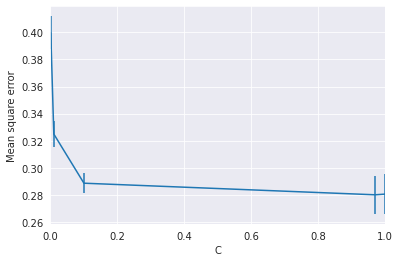

In [ ]:
cross_val_for_logisticRegression([0.001,0.01,0.1,0.97,1], CountVectorizer(stop_words='english'), X_temp, y_temp)

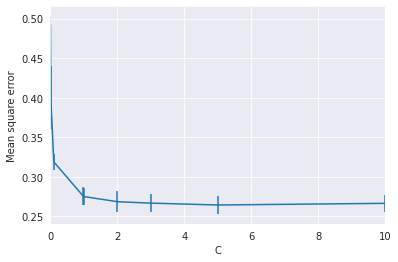

In [ ]:
cross_val_for_logisticRegression([0.001,0.01,0.1,0.97,1,2,3,5,10], TfidfVectorizer(), X_temp, y_temp)

In [ ]:
X_temp_ea = np.array(df_train['text'].values.tolist())
y_temp_ea = np.array(df_train['early_access'].values.tolist())

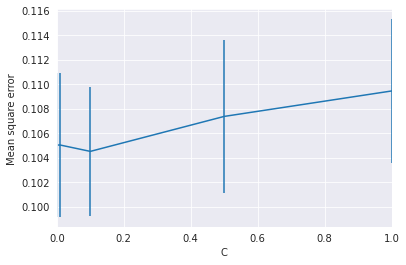

In [ ]:
cross_val_for_logisticRegression([0.001,0.01,0.1,0.5,1], CountVectorizer(stop_words='english'), X_temp_ea, y_temp_ea)

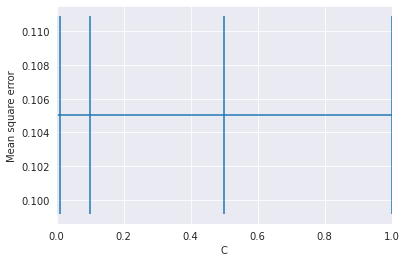

In [ ]:
cross_val_for_logisticRegression([0.001,0.01,0.1,0.5,1], TfidfVectorizer(), X_temp_ea, y_temp_ea)

In [ ]:
def cross_val_for_SVM (alpha_values,vect,X,y):
  mean_error=[]
  std_error=[]
  for alpha in alpha_values :
    model = SGDClassifier(loss= 'log', alpha=alpha)
    temp=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
      pipeline = Pipeline([('vect', vect),('clf', model)])
      pipeline.fit(X[train], y[train])
      ypred = pipeline.predict(X[test])
      score = accuracy_score(y[test],ypred)
      temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
  plt.errorbar(alpha_values,mean_error,yerr=std_error)
  plt.xlabel('alpha')
  plt.ylabel('Mean square error')
  plt.xlim((0,0.01))
  plt.show()

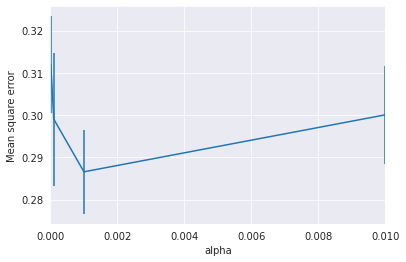

In [ ]:
cross_val_for_SVM([0.00001,0.0001,0.001,0.01], CountVectorizer(stop_words='english'), X_temp, y_temp)

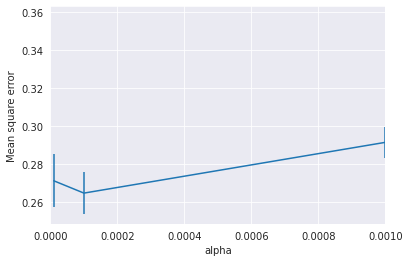

In [ ]:
cross_val_for_SVM([0.00001,0.0001,0.001,0.01], TfidfVectorizer(), X_temp, y_temp)

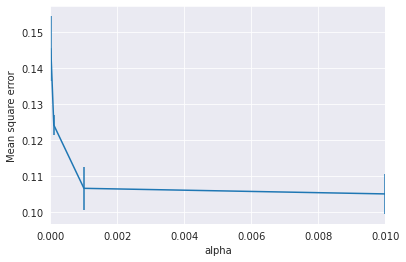

In [ ]:
cross_val_for_SVM([0.00001,0.0001,0.001,0.01], CountVectorizer(stop_words='english'), X_temp_ea, y_temp_ea)

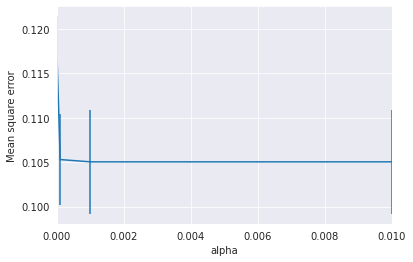

In [ ]:
cross_val_for_SVM([0.00001,0.0001,0.001,0.01], TfidfVectorizer(), X_temp_ea, y_temp_ea)

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/My Drive/ML/ML final exam/MLFinalExam.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/ML/ML final exam/MLFinalExam.ipynb to PDF
[NbConvertApp] Support files will be in MLFinalExam_files/
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConvertApp] Making directory ./MLFinalExam_files
[NbConve